In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [71]:
#Load the dataset
titanic_df = pd.read_csv("data/train.csv")

#Display the first five rows:
print(titanic_df.head()) #.head() method displays the n rows from csv file. Default arg = 5

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [72]:
#check the shape (rows, columns)
print("Shape: ", titanic_df.shape) #prints the shape of the dataset (rows and columns)

#Summary statistics for numerical columns
print(titanic_df.describe()) #prints the descriptive statistics (count, mean, median, max, min, etc.) of numerical columns

#Data types and missing values
print(titanic_df.info())

Shape:  (891, 12)
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 

titanic_df.info(): This method provides a concise summary of the DataFrame, including:

The index dtype (usually int64 for a standard index).
The data types of each column (e.g., int64, float64, object (for strings), bool).
The number of non-null values in each column. This is crucial for identifying missing data.
The memory usage of the DataFrame.

In [74]:
#find the missing values
#.isnull() determines if the numerical value is missing or not (True or 1 for missing values, False or 0 for non-null values)
#.sum() adds the number of True or 1s (i.e. counts the number of missing values.
print(titanic_df.isnull().sum()) 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [43]:
#Fill the missing value of age with median age
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace = True)
#.median() method finds the median of 'Age'.
#.fillna() method fills the missing values in 'Age' column with the median age
#inplace = True modifies the original DataFrame instead of making a new DataFrame in pandas.

/var/folders/hw/ktztp5714q7c04fqczv53mzh0000gn/T/ipykernel_29839/215666618.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace = True)


In [44]:
#Drop data from Cabin because of too many missing value
titanic_df.drop('Cabin', axis = 1, inplace = True)
#.drop() method drops a row (axis = 0) or a column (axis = 1). This method takes the column/row name (string) as an argument.

In [45]:
#Drop two rows of "Embarked" (Missing values)
titanic_df.dropna(subset = ['Embarked'], inplace = True)

In [46]:
# Group by Sex and calculate survival rate
survival_by_sex = titanic_df.groupby('Sex')['Survived'].mean().reset_index()

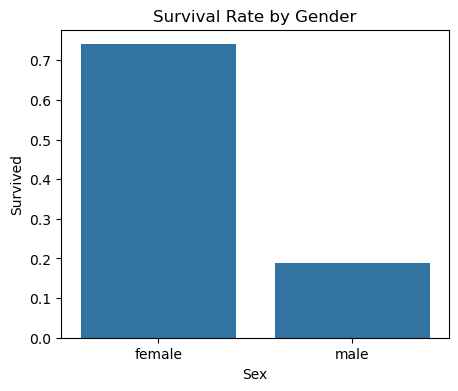

In [47]:
#Plot for sex vs. survival chances
plt.figure(figsize = (5,4)) #size of the plot
sns.barplot(x = 'Sex', y = 'Survived', data = survival_by_sex) #barplot using seaborn library
plt.title('Survival Rate by Gender') #title of the plot
plt.show() #displays the plot

Women survived at much higher rate than men.

In [48]:
# Group by class and calculate survival rate
survival_by_class = titanic_df.groupby('Pclass')['Survived'].mean().reset_index()

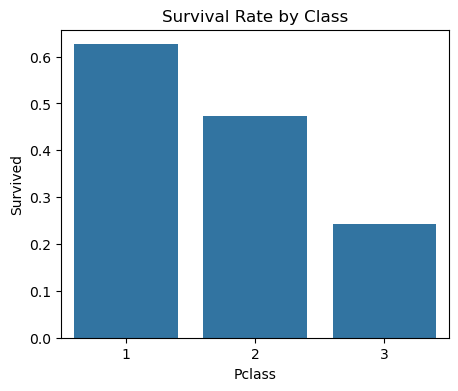

In [49]:
#Plot for class vs. survival rate
plt.figure(figsize = (5,4))
sns.barplot(x = 'Pclass', y = 'Survived', data = survival_by_class)
plt.title('Survival Rate by Class')
plt.show()

Passengers from the first class had the highest survival rate

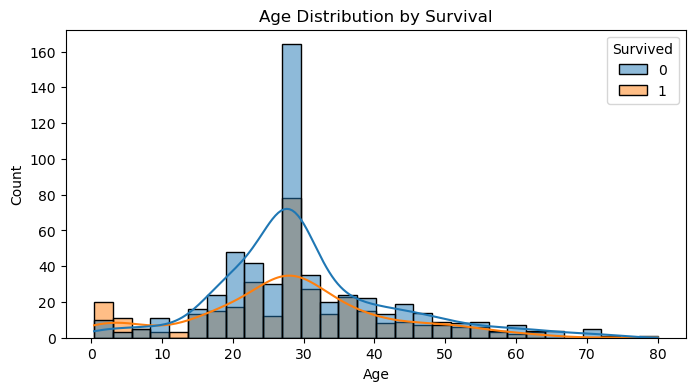

In [50]:
#Plot for age distribution vs. survival rate
plt.figure(figsize = (8,4))
sns.histplot(data = titanic_df, x = 'Age', hue = 'Survived', bins = 30, kde = True)
plt.title('Age Distribution by Survival')
plt.show()

People in mid to late 20s had highest survival rate.

Correlation Heatmap 

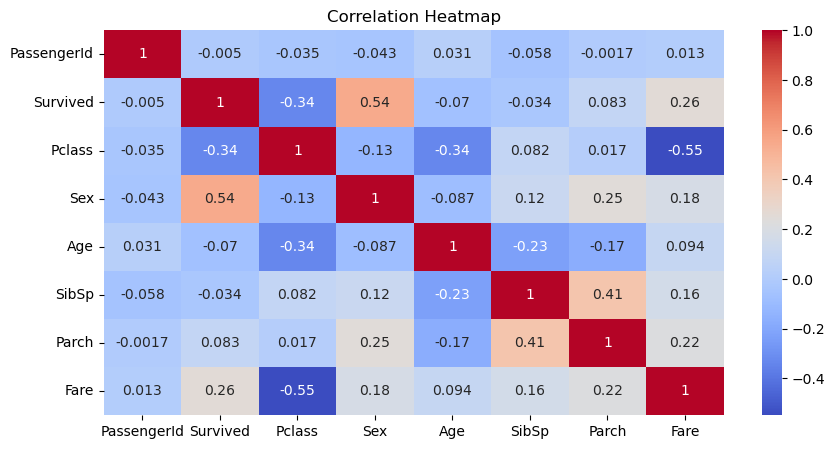

In [51]:
#converting categorical columns into numerical
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
#drop columns with non-numerical data
cols_to_drop = ['Name', 'Ticket', 'Embarked']
titanic_df_clean = titanic_df.drop(columns = cols_to_drop, errors = 'ignore')

#Compute correlations
corr = titanic_df_clean.corr()

#plot heatmap
plt.figure(figsize = (10,5))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

/var/folders/hw/ktztp5714q7c04fqczv53mzh0000gn/T/ipykernel_29839/2799634738.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_fare = titanic_df.groupby('Fare_Range')['Survived'].mean()


Fare_Range
0-50       0.319178
50-100     0.641509
100-200    0.757576
200-300    0.647059
300-400         NaN
400-500         NaN
500+       1.000000
Name: Survived, dtype: float64


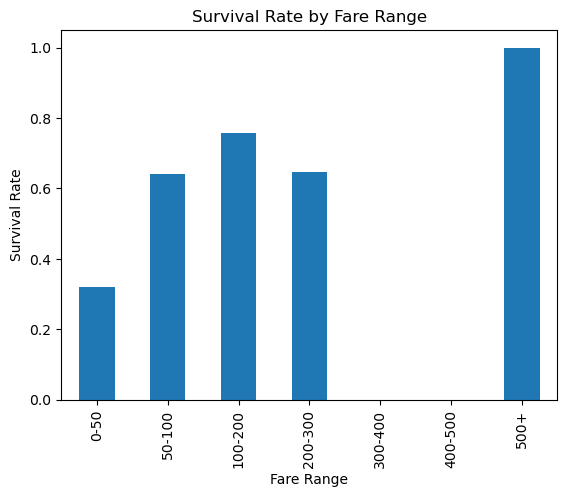

In [52]:
#Plot for fare vs. survival rate
bins = [0, 50, 100, 200, 300, 400, 500, 600]  # bins for the range of fares
labels = ['0-50', '50-100', '100-200', '200-300', '300-400', '400-500', '500+'] #labels for the bins
titanic_df['Fare_Range'] = pd.cut(titanic_df['Fare'], bins=bins, labels=labels, right=False) # right=False makes the bins include the left edge
#pd.cut() method is used to discretize continuous data (like 'Fare') into discrete intervals (bins).
# Calculate survival rate for each fare range
survival_by_fare = titanic_df.groupby('Fare_Range')['Survived'].mean()

print(survival_by_fare)

# Plotting
import matplotlib.pyplot as plt
survival_by_fare.plot(kind='bar')
plt.xlabel('Fare Range')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Fare Range')
plt.show()

The survival rate is highest for passengers who had paid high fares for the trip. The number of passengers who had paid above 500 had the highest survival rate.

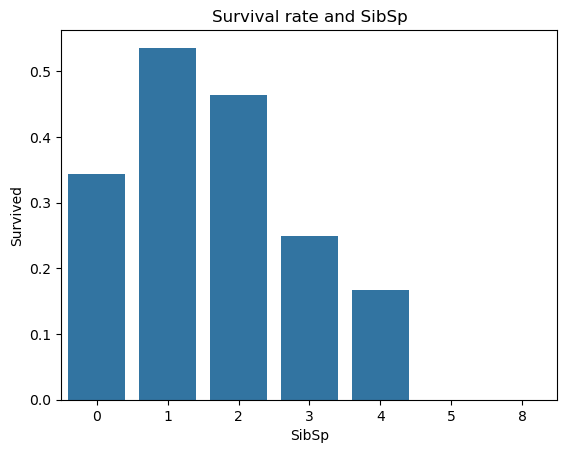

In [53]:
#survival rate and family
survival_by_family = titanic_df.groupby('SibSp')['Survived'].mean().reset_index()
sns.barplot(x='SibSp', y='Survived', data=survival_by_family)
plt.title('Survival rate and SibSp')
plt.show()

- Women and children were prioritized for lifeboats.

- Wealthier passengers (1st class) had better survival rates.

- Age alone wasn’t the strongest predictor of survival.

- Passengers who paid higher fare had a higher chance of survival.

- Passengers with more family members were less likely to survive.

In [55]:
# Load data
titanic_df = pd.read_csv("data/train.csv")

# Drop irrelevant columns
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Handle missing values
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Separate features (X) and target (y)
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

/var/folders/hw/ktztp5714q7c04fqczv53mzh0000gn/T/ipykernel_29839/3734474972.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
/var/folders/hw/ktztp5714q7c04fqczv53mzh0000gn/T/ipykernel_29839/3734474972.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

In [56]:
# Define categorical and numerical columns
categorical_features = ['Sex', 'Embarked']
numerical_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [57]:
#split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [58]:
# Create a pipeline
logreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Train the model
logreg_pipeline.fit(X_train, y_train)

# Predict on test data
y_pred_logreg = logreg_pipeline.predict(X_test)

In [59]:
# Create a pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
rf_pipeline.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_pipeline.predict(X_test)

In [60]:
#logistic regression metrics
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.2f}")
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

Logistic Regression Results:
Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix:
 [[90 15]
 [19 55]]


In [61]:
#random forest metrics
print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
 [[89 16]
 [19 55]]


In [62]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 5]
}
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Pclass',
                                                                          'Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Sex',
                                                                          'Embarked'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 5],
                         'classifier__n_estimators': [100, 200]})

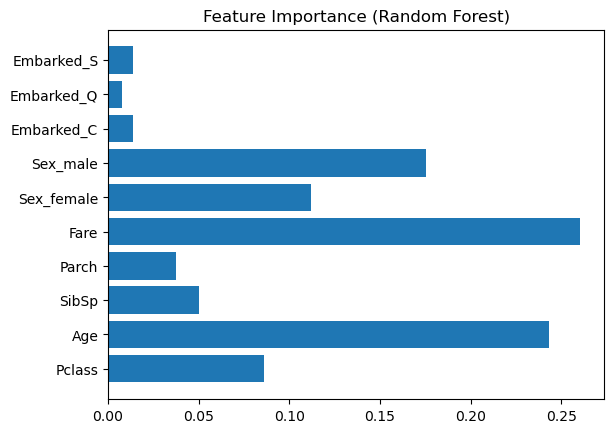

In [63]:
#feature importance
import matplotlib.pyplot as plt

feature_names = numerical_features + list(
    rf_pipeline.named_steps['preprocessor']
    .named_transformers_['cat']
    .get_feature_names_out(categorical_features)
)

plt.barh(feature_names, rf_pipeline.named_steps['classifier'].feature_importances_)
plt.title("Feature Importance (Random Forest)")
plt.show()